# Deep Learning Facial Recognition: A Siamese Neural Networks for One-shot Image Recognition Implementation

#### Alexander Swanepoel, _University of Warwick, Computer Science MSc_

## Introduction

Pattern recognition is one of the most fundmental aspects of human evolution. We process complex patterns and images, ranging from materials to surfaces, with deep introspective analysis on their particular properties. From an evolutionary perspective, the ability to parse imagery to gather environmental information such as predator identification, the ability to see wether a surface is rough or cold etc. has been paramount to our survival. By a young age (approximately six), we are able to identify more than $10^4$ categories of objects(I. Biederman, “Recognition-by-Components: A Theory of Human
Image Understanding” 1987.), negligible to the amount we will learn in our average lifetimes.

In particular, humans present a remarkble ability to successfully recognise when presente with a single instance of an example. The coginition of how this occurs remains a mystery within humans, let alone machinery, however we seek to gain insight into how this may be replicated within a machine learning system. 

This addresses the underlying motivations for the study of one-shot learning systems. With respect to single count identification, when presented with two instances of from two distinct object classes, one being an unknown object constructed from similar shapes, and the second, an amorphous shape, humans are able to recognise and reclassify the former, with significant ease relative to the latter; the implication suggests humans make use of previously learned categories with respect to indentifying new objects. This was the initial question posed by the novel and canonical one-shot research conducted by Fei-Fei et. al ("One-Shot Learning of Object Categories", Li Fei-Fei et. al). The research in the domain of one-shot learning is sparse, and has not been addressed by the scientific community, until the breakthrough paper of Gregory Koch et. al, presenting a state-of-the-art model, utilising siamese neural networks ("Signature Verification using a "Siamese"
Time Delay Neural Network", Bromley et. al, https://www.cs.cmu.edu/~rsalakhu/papers/oneshot1.pdf). The algorithm itself, ranks similarity between inputs, presenting an opportunity in research and industry for applications toward classification problems.

In this notebook, we seek to explore and implement the algorithm, while exposing the algorithm to new datasets, to develop a facial recognition system, ranking the similarity between inputs. This notebook will take a pedagogical approach, where we undergo direct implementation from white-paper to application, with brief digressions to explain underlying principles.

## Datasets & Preprocessing

The siamese neural network will require two distinct inputs such that we require an anchor input, representing the image used to verify the input structure is the same, as well as a verification input, or the image being compared pointwise; the desired output is verification of similarity such that the output is in the form ${\displaystyle \{0,1\}\,;}{\displaystyle \mathbf {1} _{A}(x)=1}$ if an element $ {\displaystyle x}$, where $x \in X$ belongs to A, and ${\displaystyle \mathbf {1} _{A}(x)=0}$, otherwise. With respect to the neural network, we require a dataset such that the network can be pretrained to identify facial feature vectors where the features themselves are known to only produce a given output ${\displaystyle \mathbf {1} _{A}(x)=0}$, known as negative training. A robust and conventional dataset with respect to facial recognition and facial feature processing in the machine learning domain is the "Labelled Faces In The Wild" dataset, where the dataset consists of 13233 images, 5749 people, where 1680 people have two or more images. Each image is a 250x250 jpg, detected and centered using the openCV
implementation of Viola-Jones face detector.  The cropping region
returned by the detector was then automatically enlarged by a factor
of 2.2 in each dimension to capture more of the head and then scaled
to a uniform size.

- <b>Anchor Dataset</b>: Image directory acquired via webcam
- <b>Positive (Verification) Dataset</b>: Image directory acquired via webcam
- <b>Negative Dataset</b> : "Labelled Faces in the Wild" Source:http://vis-www.cs.umass.edu/lfw/

## The Siamese Neural Network Architecture

### High-Level Architecture

The siamese neural network, is an artificial neural network, that given a two distinct input vectors simultaneously, produces a comparable output vector. Analogous to comparison of two fingerprints, it can be derived more rigorously via a distance function, or locality-sensitive hashing. The network itself, as shown in the figure below (source:https://www.cs.cmu.edu/~rsalakhu/papers/oneshot1.pdf) , gives us a visual representation of the processes occuring. Initially, two distinct inputs(images), $x_{1,1}$, $x_{2,1}$, are inputted into two identical clone neural nets, learning their respective distance functions, $d_1$, $d_{N_2}$, between the two vector representations produced by the identical neural net outputs. The paper under examination instantiates a version of this process however with the addition of convolutional layers, feature vector mapping in the layers to process the image through a series of convolutions to yield a feature vector. Then, said feature vector was trained and with respect to the images discriminative features. For completeness, the distance comparison layer was removed and subtituted with a classification layer.


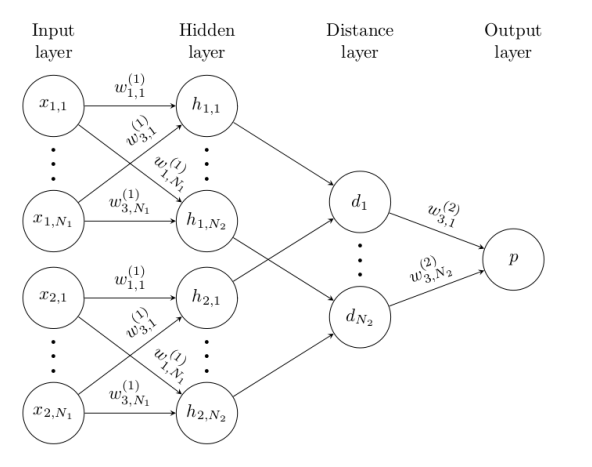

### Convolutional Neural Network Structure

For brevity, the intricacies of the network have been distilled, for more rigorous intuiton please the the initial paper. Following, the initial neural net consists of $L$ layers, containing $N_L$ units, such that $h_{1,l}$ represents the hidden vector contained in layer l, for the first clone, and $h_{2,l}$ for the second. Then, exclusive employment of the ReLU activation function $f(x) = x^+ = max(0,x)$, where $x$ is the input to a given neuron, is applied to the first $L-2$ layers, and sigmoidal activation functions, $
\hat{y}=\sigma (z) = \frac{1}{1+e^{-z}}$, where σ denotes the sigmoid activation function and the output we get after the forward prorogation is known as the predicted value ŷ, to the latter.

The model is comprised of several convolutional layers such that each layer is assigned to a single channel with defined filters in the range of stride $[0,1]$. The network employs the ReLU activation function
to the output feature maps, optionally followed by maxpooling function, assigned with filter of stride $[0,2]$. Then a filter is applied to each sequential layer via
\begin{equation}
a^{(k)}_{1,m} = max-pool(max(0,W^{k}_{l-1,l}\star h_{1,(l-1)}+b_l),2)\\
a^{(k)}_{2,m} = ax-pool(max(0,W^{k}_{l-1,l}\star h_{2,(l-1)}+b_l),2)
\end{equation}

Where, $W^{k}_{l-1,l}$ is a tensor of the feature maps, and $\star$ is the valid convolutional operation with respect to returning only a given output unit that had complete overlap between the convolutional layer and the input feature map.

The final convolutional layer is flattened in a single array. Then, an induced distance metric layer, connecting the clone neural nets, passed into a single sigmoid output. A visualisation of the convolutional layer can be depicted below (source:https://www.cs.cmu.edu/~rsalakhu/papers/oneshot1.pdf). 

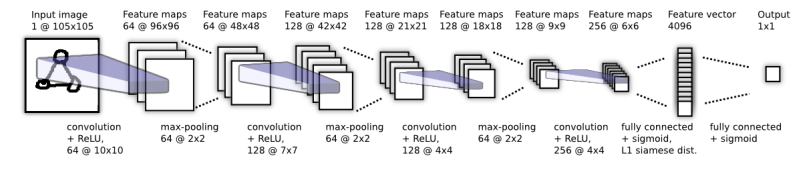

### Mathematical Framework 

#### Loss Function 

The loss function imposed is denoted as follows; Let M represent the minibatch size, where i indexes the i'th minibatch. Let $y(x^{(i)}_{1},x^{(i)}_{2}$ be a vector, containing the labels, under the imposition that it is set equal to 1 whenever $x_1$ and $x_2$ are from the same class, and 0 otherwise. 

Continuing, we implement a regularised cross-entropy objective on the given binary classifier;

\begin{equation}
\mathcal{L}(x^{(i)}_{1},x^{(i)}_{2}) = y(x^{(i)}_{1},x^{(i)}_{2}) \, log \, p \, (x^{(i)}_{1},x^{(i)}_{2}) + (1 - yx^{(i)}_{1},x^{(i)}_{2}))\,log \,(1 - p \, (x^{(i)}_{1},x^{(i)}_{2})) + \lambda^T|w|^2
\end{equation}

#### Optimisation

Utilisation of a standard backpropogation algorithm is imposed, where the gradient is additive. The minibatch size is fixed to 128, with a learning rate $\eta_j$, and a momentum $\mu_j$. Then, with a given weighting $\lambda_j$, defined layer-wise, the update function at a time, T is given by:
\begin{equation}
W^{T}_{kj}(x^{(i)}_{1},x^{(i)}_{2}) = w^{T}_{kj}+\Delta W^{T}_{kj}(x^{(i)}_{1},x^{(i)}_{2}) + 2\lambda_j |w_{kj}|\Delta w^{T}_{kj}(x^{(i)}_{1},x^{(i)}_{2}) = -\eta_j \nabla W^{T}_{kj} + \mu_j \Delta W^{(T-1)}_{kj}
\end{equation}
where $\nabla W^{T}_{kj}$ is the partial differential of with respect to the weightings between the jth neuron and the kth neuron in a given layer.

# Implementation

### Initial Dependencies, Memory Management & Data Preprocessing 

In [2]:
#Package Dependencies
import cv2
import os
import random
import numpy as np
from matplotlib import pyplot as plt

In [3]:
#Tensorflow Functional API Framework
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Conv2D, Dense, MaxPooling2D, Input, Flatten
import tensorflow as tf

In [4]:
# GPU Memory Management for Out Of Memory error handling
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

As mentioned previously, the siamese neural network will require two distinct inputs such that we require an anchor input, as well as a verification input where the desired output is verification of similarity such that the output is in the form  ${\displaystyle \{0,1\}\,;}{\displaystyle \mathbf {1} _{A}(x)=1}$ if an element $ {\displaystyle x}$, where $x \in X$ belongs to A, and ${\displaystyle \mathbf {1} _{A}(x)=0}$, otherwise. Then, we require installation of directories for said input, negative and anchor images. 

In [13]:
# Path Setup 
POS_PATH = os.path.join('data', 'positive')
NEG_PATH = os.path.join('data', 'negative')
ANC_PATH = os.path.join('data', 'anchor')

In [14]:
# Dir. Setup
os.makedirs(POS_PATH)
os.makedirs(NEG_PATH)
os.makedirs(ANC_PATH)

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'data\\positive'

In [11]:
#Labelled Faces In The Wild Dataset Import and Processing (Images given in a gzipped tar file)
#Decompression
!tar -xf lfw.tgz

In [12]:
# Redirection of images to their respective positive and negative directories
for directory in os.listdir('lfw'):
    for file in os.listdir(os.path.join('lfw', directory)):
        EX_PATH = os.path.join('lfw', directory, file)
        NEW_PATH = os.path.join(NEG_PATH, file)
        os.replace(EX_PATH, NEW_PATH)

#### Aquisition of Positive and Anchor Classes

In [4]:
#Dependencies
#uuid for unique identifiers for a given image
import uuid

In [71]:
#Webcam Integration
cap = cv2.VideoCapture(0)
cv2.namedWindow("test")
img_counter = 0

    # Anchor Collection & Positive Collection
    
""" Keybind insertion such that key 'space' collects images
    Escape key will exit protocol
    Use: # Release the webcam
            cap.release()
         # Restart Clause
            cv2.destroyAllWindows()
    For positive images, change directory in img_name variable from ANC_PATH to POS_PATH
"""

while True:
    ret, frame = cap.read()
    
    # Image cut to 250x250 Pixels 
    frame = frame[120:120+250,200:200+250, :]
        
    if not ret:
        print("failed to grab frame")
        break
    cv2.imshow("test", frame)

    k = cv2.waitKey(1)
    if k%256 == 27:
        # ESC pressed
        print("Escape hit, closing...")
        break
    elif k%256 == 32:
        # SPACE pressed
        img_name = imgname = os.path.join(POS_PATH, '{}.jpg'.format(uuid.uuid1()))
        cv2.imwrite(img_name, frame)
        print("{} written!".format(img_name))
        img_counter += 1

data\positive\6e165a21-9bce-11ec-a692-502b73d01277.jpg written!
Escape hit, closing...


In [72]:
# Release the webcam
cap.release()
# Restart Clause
cv2.destroyAllWindows()

## Data Loading and Preproccessing into TensorFlow

In [18]:
#Directories
#Wild-Card Search
anchor = tf.data.Dataset.list_files(r"C:\Users\alexs\data\anchor"+'\*.jpg').take(300)
positive = tf.data.Dataset.list_files(r"C:\Users\alexs\data\positive"+'\*.jpg').take(300)
negative = tf.data.Dataset.list_files(r"C:\Users\alexs\data\negative"+'\*.jpg').take(300)

In [19]:
#TEST#
dir_test = anchor.as_numpy_iterator()
print(dir_test.next())

b'C:\\Users\\alexs\\data\\anchor\\40f04888-9bcc-11ec-9246-502b73d01277.jpg'


### Scaling and Augmentation

In [20]:
"""
Normalisation function to resize images in the value range [0,1] such that
we perform a normalised gradient descent

"""
def preprocess(file_path):
    
    # TensorFlow Image Read
    byte_img = tf.io.read_file(file_path)
    # TensorFlow Image Load 
    img = tf.io.decode_jpeg(byte_img)
    
    # Augmentation - Image Resize Dimensions: 100x100x3px (Original Paper Augments to 100x100)
    img = tf.image.resize(img, (100,100))
    # Normalisation Scaling
    img = img / 255.0
    
    # Return image
    return img

In [21]:
#TEST#
img = preprocess('data\\anchor\\3a2856e5-9bcc-11ec-b990-502b73d01277.jpg')
img.numpy().max()

1.0

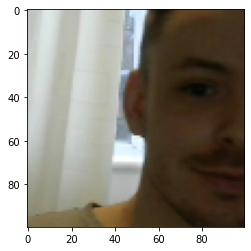

In [78]:
plt.imshow(img)

In [79]:
#Dataset.map(preprocess)

NameError: name 'dataset' is not defined

### Dataset Labelling

[Anchor, Positive] Dataset will be labelled in the range $[1,1]$, such that they mirror a conventional test dataset, and [Anchor,Negative] will be labelled in the range $[0,0]$ respectively. 

In [22]:
positives = tf.data.Dataset.zip((anchor, positive, tf.data.Dataset.from_tensor_slices(tf.ones(len(anchor)))))
negatives = tf.data.Dataset.zip((anchor, negative, tf.data.Dataset.from_tensor_slices(tf.zeros(len(anchor)))))
data = positives.concatenate(negatives)

In [23]:
#TEST#
samples = data.as_numpy_iterator()
exampple = samples.next()
exampple

(b'C:\\Users\\alexs\\data\\anchor\\3d6445be-9bcc-11ec-9bba-502b73d01277.jpg',
 b'C:\\Users\\alexs\\data\\positive\\f6b14c5d-9bcc-11ec-889f-502b73d01277.jpg',
 1.0)

### Train and Test Partition

In [24]:
#Instantiation of a preprocess function defined  such that we are able to preprocess twin images

def preprocess_twin(input_img, validation_img, label):
    return(preprocess(input_img), preprocess(validation_img), label)

In [90]:
#TEST#
#res = preprocess_twin(*exampple)
#len(res)
#res[0]
#res[1]
#res[2]
#plt.imshow(res[0])
#plt.imshow(res[1])

#### Pipeline Implementation

In [25]:
#Data Loading Pipeline
data = data.map(preprocess_twin)
data = data.cache()
data = data.shuffle(buffer_size=1024)

In [26]:
# Train-Set Partition
train_data = data.take(round(len(data)*.7))
train_data = train_data.batch(16)
train_data = train_data.prefetch(8)

In [27]:
# Test-Set Partition
test_data = data.skip(round(len(data)*.7))
test_data = test_data.take(round(len(data)*.3))
test_data = test_data.batch(16)
test_data = test_data.prefetch(8)

# Siamese Neural Network Implementation

## Embedding Layer Construction

In [28]:
#Defining Input Layer
#Input Layer instantiation such that the shape takes the form 100x100px
#For mirror instantiation change shape to (105,105,3)
inp = Input(shape=(100,100,3), name='input_image')

In [29]:
"""
#Initial Convolutional Layer with a Stride of 1
64 filters, with a 10x10px shape, with ReLU activation 
Yields: a Keras Tensor such that Shape (96, 96, 64)
Subscripts indicate their respective blocks 

"""
c1 = Conv2D(64, (10,10), activation='relu')(inp)

#### Feature Mapping

In [30]:
#MaxPooling Layer 
m1 = MaxPooling2D(64, (2,2), padding='same')(c1)

In [ ]:
#Block Two with their respective parameters
c2 = Conv2D(128, (7,7), activation='relu')(m1)
m2 = MaxPooling2D(64, (2,2), padding='same')(c2)

In [32]:
#Block Three with their respective parameters
c3 = Conv2D(128, (4,4), activation='relu')(m2)
m3 = MaxPooling2D(64, (2,2), padding='same')(c3)

In [33]:
#Block Two with their respective parameters
"""
f1 will represent a the feature vector composed of the 256 @ 6x6 feature map 
where the layer is fully connected with a sigmoid activation function

"""
c4 = Conv2D(256, (4,4), activation='relu')(m3)
f1 = Flatten()(c4)
d1 = Dense(4096, activation='sigmoid')(f1)

In [34]:
mod = Model(inputs=[inp], outputs=[d1], name='embedding')

In [44]:
embedding = make_embedding()

##### TensorFlow Model Summary

For direct comparison we show the model architecture visualisation below for convenience , we are able to see a mirror of the instantiation of the tensorflow model, with a 1:1 correspondence with respect to the original siamese neural network. We remark that the original research contains the input layer shape 105x105 however we have chosen to input 100x100 for simplicity.

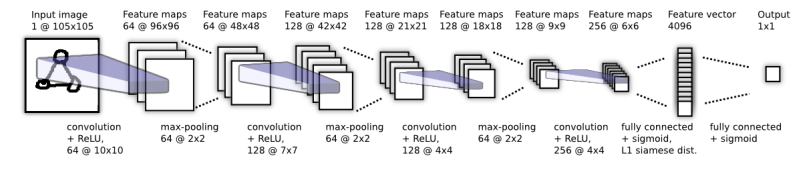

In [35]:
mod.summary()

Model: "embedding"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_image (InputLayer)     [(None, 100, 100, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 91, 91, 64)        19264     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 46, 46, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 40, 40, 128)       401536    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 20, 20, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 17, 17, 128)       262272    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 9, 9, 128)         0 

In [39]:
"""
For visualisation of blocks please see figure of architecture above.

"""
def make_embedding(): 
    inp = Input(shape=(100,100,3), name='input_image')
    
    # Block 1
    c1 = Conv2D(64, (10,10), activation='relu')(inp)
    m1 = MaxPooling2D(64, (2,2), padding='same')(c1)
    
    # Block 2
    c2 = Conv2D(128, (7,7), activation='relu')(m1)
    m2 = MaxPooling2D(64, (2,2), padding='same')(c2)
    
    # Block 3
    c3 = Conv2D(128, (4,4), activation='relu')(m2)
    m3 = MaxPooling2D(64, (2,2), padding='same')(c3)
    
    # Block 4 with flattening and dense layer imple mentation
    c4 = Conv2D(256, (4,4), activation='relu')(m3)
    f1 = Flatten()(c4)
    d1 = Dense(4096, activation='sigmoid')(f1)
    
    
    return Model(inputs=[inp], outputs=[d1], name='embedding')

We note that due to the nature of the siamese neural network, two input vectors will be simultaneously processed through the convolutions, into an embedding layer such that two feature vectors containing 4096 units are outputted with respect to their corresponding input vectors.

### Distance Layer Instantiation

#### $L^1$ Norm, Manhattan Distance

The Manhattan distance, or $L^1 $ Norm can be defined colloqually as the distance between two points$(x_{1},y_{1})$ and $(x_{2},y_{2})$ is given by $ |x_{1}-x_{2}|+|y_{1}-y_{2}|$. That is, it is the sum of the absolute values of the differences between both sets of coordinates. The mathematically rigorous definition expanded to n-dimensional space can be defined as follows; the distance $d_1$, between two vectors $\textbf a$, $\textbf b$,  in an n-dimensional real vector space with a fixed set of cartesians, is the sum of the length of the projections of the line segment between the point onto the coordiante axes, such that:

\begin{equation}
d1(\textbf a, \textbf b) = || \textbf a - \textbf b ||_1 = \sum^{n}_{i=1}|a_i - b_i|
\end{equation}
where $(\textbf a, \textbf b)$ are real vectors, in the form,
\begin{equation}
\textbf a = (a_1,a_2,...,a_n) \\
\textbf b = (b_1,b_2,...,b_n)
\end{equation}

When extrapolated to 2 dimensions can be shown to give $(a_1,a_2)$ $(b_1,b_2)$ = $|a_1-b_1| + |a_2-b_2|$.

In [52]:
# L^1 Norm distance Layer Implementation
class L1Dist(Layer):
    
    # Init method with concatenated inheritance
    def __init__(self, **kwargs):
        super().__init__()
       
    # tf.math.abs will produce the sum of the absolute values of the differences between both sets of coordinates
    def call(self, input_embedding, validation_embedding):
        return tf.math.abs(input_embedding - validation_embedding)

In [53]:
l1 = L1Dist()

In [54]:
l1(anchor_embedding, validation_embedding)

NameError: name 'anchor_embedding' is not defined

## Siamese Neural Network Model

In [55]:
"""
Siamese Model Instantation:
Takes inputs of input image and validation image, 
and outputs a value classified via the sigmoid activation function producing an 
output of shape 1 or 0, with respect to the similarity of the images as defined previously above.

"""

def make_siamese_model(): 
    
    # Anchor image input Handle
    input_image = Input(name='input_img', shape=(100,100,3))
    
    # Validation image input Handle
    validation_image = Input(name='validation_img', shape=(100,100,3))
    
    # Combine siamese distance components
    siamese_layer = L1Dist()
    siamese_layer._name = 'distance'
    distances = siamese_layer(embedding(input_image), embedding(validation_image))
    
    # Classification layer 
    classifier = Dense(1, activation='sigmoid')(distances)
    
    return Model(inputs=[input_image, validation_image], outputs=classifier, name='SiameseNetwork')

In [56]:
siamese_model = make_siamese_model()

#### Siamese Neural Network Model Summary 

In [57]:
siamese_model.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_img (InputLayer)          [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
validation_img (InputLayer)     [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
embedding (Functional)          (None, 4096)         38960448    input_img[0][0]                  
                                                                 validation_img[0][0]             
__________________________________________________________________________________________________
distance (L1Dist)               (None, 4096)         0           embedding[0][0]     

# Neural Network Training 

### Loss Function and Optimisation Implementation

The binary cross-entropy loss function can be ogistic regression typically optimizes the log loss for all the observations on which it is trained, which is the same as optimizing the average cross-entropy in the sample. For example, suppose we have {\displaystyle N}N samples with each sample indexed by {\displaystyle n=1,\dots ,N}n=1,\dots ,N. The average of the loss function is then given by:

\begin{aligned}J(\mathbf {w} )\ &=\ {\frac {1}{N}}\sum _{n=1}^{N}H(p_{n},q_{n})\ =\ -{\frac {1}{N}}\sum _{n=1}^{N}\ {\bigg [}y_{n}\log {\hat {y}}_{n}+(1-y_{n})\log(1-{\hat {y}}_{n}){\bigg ]}\,,\end{aligned}

where 

\begin{aligned}
{\displaystyle {\hat {y}}_{n}\equiv g(\mathbf {w} \cdot \mathbf {x} _{n})=1/(1+e^{-\mathbf {w} \cdot \mathbf {x} _{n}})}{\displaystyle {\hat {y}}_{n}\equiv g(\mathbf {w} \cdot \mathbf {x} _{n})=1/(1+e^{-\mathbf {w} \cdot \mathbf {x} _{n}})}
\end{aligned} with $ {\displaystyle g(z)} =1/(1+e^{{-z}}) $ as the logistic function.

The logistic loss is sometimes called cross-entropy loss. It is also known as log loss (In this case, the binary label is often denoted by {−1,+1}). 

(reference:  Murphy, Kevin (2012). Machine Learning: A Probabilistic Perspective. MIT. ISBN 978-0262018029.)

In [58]:
#Binary Cross-Entropy Instantiation
binary_cross_loss = tf.losses.BinaryCrossentropy()

#### Adam Optimisation

Adam is an optimisation algorithm that can be used instead of the classical stochastic gradient descent procedure to update network weights iterative based in training data. for more information on the Adam optimisation algorithm see: https://arxiv.org/abs/1412.6980

However, Adam can be considered to be a subsitute optimization algorithm for stochastic gradient descent for training deep learning models such that the best properties of the AdaGrad and RMSProp algorithms are instantiated and combined to provide an optimization algorithm that can handle sparse gradients on noisy problems.

In [59]:
#Learning rate of 1e-4, such that it learns at a rate of 0.0001
opt = tf.keras.optimizers.Adam(1e-4)

### Establishing Intermediate Bookmarks 

In [61]:
"""
We establish checkpoints as a failsafe to avoid common error corruption of the model

To reload from a given checkpoint, use the command: model.load('path_to_checkpoint')
this will load pretrained weights into the existing model.

"""

checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, 'ckpt')
checkpoint = tf.train.Checkpoint(opt=opt, siamese_model=siamese_model)

### Construction of Training One-Shot Step Function

The high-level approach implemented will be such that the training will be conducted on a single batch. Initially we begin by gathering a prediction result, then we calculate the loss of the given prediction. From that, we can derive the gradients associated with the gradient descent, and moreover, begin to reassess the respective weightings, to lastly apply the model.

In [62]:
test_batch = train_data.as_numpy_iterator()

In [63]:
batch_1 = test_batch.next()

In [66]:
### TEST ###
#len(batch_1)
#batch_1[1]
#len(batch_1[1])

16

In [67]:
#Setting X i.e. Training Features
X = batch_1[:2]

In [68]:
### TEST ###
""" 
Each bach in the dataset is comprised of 16 sampled images each containing
an anchor image, a positive, or negative image, and an associated label.

"""
np.array(X).shape

(2, 16, 100, 100, 3)

In [69]:
# Retrieving Labels
y = batch_1[2]

In [70]:
y

array([1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0.],
      dtype=float32)

In [71]:
tf.losses.BinaryCrossentropy??

In [75]:
"""
Compiles a function into a callable TensorFlow Graph
documentation: https://www.tensorflow.org/api_docs/python/tf/function 

tf.GradientTape records operations for the differentiation
documentation: https://www.tensorflow.org/api_docs/python/tf/GradientTape

Note: training=True is integral as some neural network layers behave differently during training and inference,
for example Dropout and BatchNormalization layers. For example during training, dropout will randomly drop out
units and correspondingly scale up activations of the remaining units. During inference, it does nothing
(since you usually don't want the randomness of dropping out units here). The training argument lets the 
layer know which of the two "paths" it should take. If you set this incorrectly, your network might not 
behave as expected.

"""

@tf.function
def train_step(batch):
    
    # GradientTape Operation Recorder 
    with tf.GradientTape() as tape:     
        # Get anchor and positive/negative image
        X = batch[:2]
        # Get label
        y = batch[2]
        
        # Forward pass 
        yhat = siamese_model(X, training=True)
        # Loss Computation
        loss = binary_cross_loss(y, yhat)
    print(loss)
        
    # Compute gradients
    grad = tape.gradient(loss, siamese_model.trainable_variables)
    
    # Compute updated respective weightings and apply
    opt.apply_gradients(zip(grad, siamese_model.trainable_variables))
        
    # Return loss
    return loss

### Training Loop and Training 

In [72]:
# Import metric computations
from tensorflow.keras.metrics import Precision, Recall

In [73]:
def train(data, EPOCHS):
    # Training Loop
    for epoch in range(1, EPOCHS+1):
        print('\n Epoch {}/{}'.format(epoch, EPOCHS))
        progbar = tf.keras.utils.Progbar(len(data))
        
        # Creating a metric object 
        r = Recall()
        p = Precision()
        
        # Counter for each batch and Batch-Looping 
        for idx, batch in enumerate(data):
            # Step Function Training
            loss = train_step(batch)
            yhat = siamese_model.predict(batch[:2])
            r.update_state(batch[2], yhat)
            p.update_state(batch[2], yhat) 
            progbar.update(idx+1)
        print(loss.numpy(), r.result().numpy(), p.result().numpy())
        
        # Save checkpoints every 10 epochs
        if epoch % 10 == 0: 
            checkpoint.save(file_prefix=checkpoint_prefix)

### Training


In [74]:
#Set Epochs
EPOCHS = 50

In [76]:
#Training Initialisation
train(train_data, EPOCHS)


 Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Tensor("binary_crossentropy/weighted_loss/value:0", shape=(), dtype=float32)
Tensor("binary_crossentropy/weighted_loss/value:0", shape=(), dtype=float32)
27/27 [==============================] - 356s 13s/step
0.46866918 0.7116279 0.9807692

 Epoch 2/50
27/27 [==============================] - 352s 13s/step
0.1372744 0.9205608 0.9752475

 Epoch 3/50
27/27 [=============================

## Model Performance Evaluation

## Performance Metrics

We seek to employ the performance metrics precision and recall. Precision, formally referred to as the psitive predictive value, is the proportion of relevant instances with respect to the retrieved instances. The recall, formally, sensitivity, is defined as the proportion of relevant instances retrieved. Mathematically speaking, Precision and recall are then defined as:

\begin{aligned}{\text{Precision}}&={\frac {tp}{tp+fp}}\\{\text{Recall}}&={\frac {tp}{tp+fn}}\,\end{aligned}

The confusion matrix for the the following conditions can be shown as:
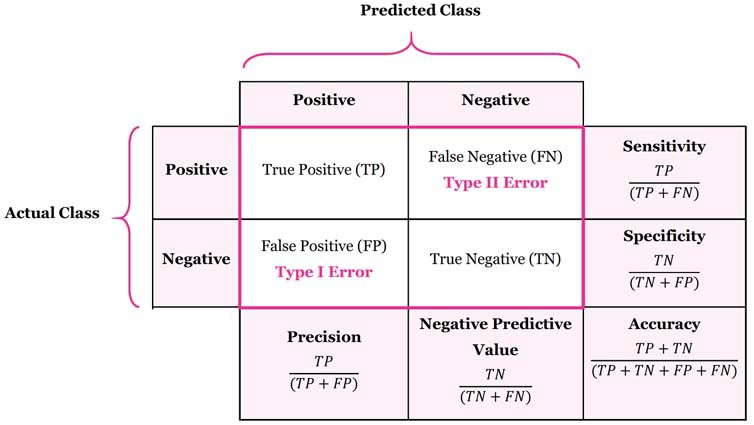

For more information please see: https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall. 

In [77]:
# Import Performance Metrics
from tensorflow.keras.metrics import Precision, Recall

### Prediction Construction

In [78]:
# Grab batch of data
test_input, test_val, y_true = test_data.as_numpy_iterator().next()

In [82]:
### TEST ###
#test_var = test_data.as_numpy_iterator().next()
#len(test_var[0])
#len(test_val[1])

In [86]:
#Predicition Label
y_hat = siamese_model.predict([test_input, test_val])

In [87]:
y_hat

array([[2.5677099e-07],
       [9.9919808e-01],
       [2.4832129e-08],
       [4.5421948e-06],
       [2.0289510e-05],
       [3.4894055e-07],
       [1.0000000e+00],
       [1.3313368e-09],
       [5.8820915e-06],
       [3.7223532e-07],
       [2.0622745e-05],
       [1.3741851e-04],
       [1.8784350e-09],
       [1.0000000e+00],
       [2.8053955e-06],
       [3.3029914e-04]], dtype=float32)

We note the predictive values of $\hat y $ are in the range $[0,1]$, where the values negative instances are approximating toward zero, and the positive instances are defined to be 1. Then, we then implement a post-processing binary function such that the predictive values are classified into a binary category.

In [88]:
# Binary Classification given from above
#Pythonic if-else statement for list comprehension
[1 if prediction > 0.5 else 0 for prediction in y_hat ]

[0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0]

In [85]:
y_true

array([0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
      dtype=float32)

Anecdotally speaking, visually mapping the y_true array with respect to the y_hat array, one could see the values are equivalent. Moreover, highly accurate.

#### Prediction Computation

In [89]:
#Performance metric object instantiation
#Recall() and Precision() interchangable for metric variable
m = Recall()

#Recall Computation
m.update_state(y_true, y_hat)

#return
m.result().numpy()

1.0

In [ ]:
#Iterate over all given batches 

r = Recall()
p = Precision()

for test_input, test_val, y_true in test_data.as_numpy_iterator():
    yhat = siamese_model.predict([test_input, test_val])
    r.update_state(y_true, yhat)
    p.update_state(y_true,yhat) 

print(r.result().numpy(), p.result().numpy())

#### Visualisation

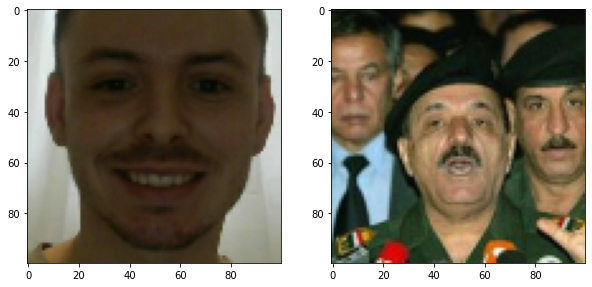

In [94]:
# Set plot size 
plt.figure(figsize=(10,8))

# Set first subplot
plt.subplot(1,2,1)
plt.imshow(test_input[1])

# Set second subplot
plt.subplot(1,2,2)
plt.imshow(test_val[3])

#Render
plt.show()

From the above, we can see from the test input array element, and the test value array element, as previously defined from elementwise comparison, the two images are indeed non-matching.

## Model Save

In [ ]:
## Save Weightings 
siamese_model.save('siamesemodelv2.h5')

In [ ]:
#Model Loading
#siamese_model = tf.keras.models.load_model('siamesemodelv2.h5', 
#                                   custom_objects={'L1Dist':L1Dist, 'BinaryCrossentropy':tf.losses.BinaryCrossentropy})

In [ ]:
# Reloaded Model Predictions
#siamese_model.predict([test_input, test_val])

## Model Summary

In [95]:
siamese_model.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_img (InputLayer)          [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
validation_img (InputLayer)     [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
embedding (Functional)          (None, 4096)         38960448    input_img[0][0]                  
                                                                 validation_img[0][0]             
__________________________________________________________________________________________________
distance (L1Dist)               (None, 4096)         0           embedding[0][0]     

## Real-Time Testing via Application Based Webcam Imagery

For robust testing and complete we seek to develop an application such that the one-shot classification model is tested on a real-time frame basis. Then, we progress by constructing a verification function such that there is an adequate detection threshold, where the performance metric evaluates the input to be of sufficient quality to be deemed a positive input. Moreover, we define the verification threshold to be a ratio of the given positive prediction, with respect to the sum total of the positive samples. 

We then construct an video capture application via the library, Kivy. For documentation please see:https://kivy.org/doc/stable/api-kivy.app.html. 

### High-Level Overview

We initialise the process by accessing a webcam via the OpenCV libraries. Upon succession we retrieve the input vector (image), for comparison against pre-collect positive instance directory. Moreover, we iterate through the positive instance directory, performing individual predictions for each instance. Both the initialised input image, and the positive image will be fed forward through the siamese neural network simultaneously, resulting in an output computation in a given binary classifier $[0,1]$ where 1 represents a verified likelihood, and 0 otherwise. By proxy we have implicitly defined a verification threshold, such that the likelihood of similarity of the images is satisfactory. We also look to define a detection threshold as described above.

#### Verification Function 

In [ ]:
application_data\verification_images

In [ ]:
os.listdir(os.path.join('application_data', 'verification_images'))

In [ ]:
os.path.join('application_data', 'input_image', 'input_image.jpg')

In [ ]:
for image in os.listdir(os.path.join('application_data', 'verification_images')):
    validation_img = os.path.join('application_data', 'verification_images', image)
    print(validation_img)

In [100]:
#Verification Function
def verify(model, detection_threshold, verification_threshold):
    # Build results array
    results = []
    for image in os.listdir(os.path.join('application_data', 'verification_images')):
        input_img = preprocess(os.path.join('application_data', 'input_image', 'input_image.jpg'))
        validation_img = preprocess(os.path.join('application_data', 'verification_images', image))
        
        # Make Predictions 
        result = model.predict(list(np.expand_dims([input_img, validation_img], axis=1)))
        results.append(result)
    
    # Detection Threshold: Metric above which a prediciton is considered positive 
    detection = np.sum(np.array(results) > detection_threshold)
    
    # Verification Threshold: Proportion of positive predictions / total positive samples 
    verification = detection / len(os.listdir(os.path.join('application_data', 'verification_images'))) 
    verified = verification > verification_threshold
    
    return results, verified

## OpenCV Webcam Realtime Verification

In [113]:
camera = cv2.VideoCapture(0)
cv2.namedWindow("test")
img_counter = 0

    # Input Image Collection
    
""" 

Keybind insertion such that key 'space' collects images
    Escape key will exit protocol
    Use: # Release the webcam
            camera.release()
         # Restart Clause
            cv2.destroyAllWindows()

Verification model instantiated within the function such that verified is given 
within a 90% verification threshold *change by changing the 0.5,0.5 values.
Where the former value is detection threshold values, and the latter being verification Threshold

"""

while True:
    ret, frame = camera.read()
    
    # Image cut to 250x250 Pixels 
    frame = frame[120:120+250,200:200+250, :]
        
    if not ret:
        print("failed to grab frame")
        break
    cv2.imshow("test", frame)

    k = cv2.waitKey(1)
    if k%256 == 27:
        # ESC pressed
        print("Escape hit, closing...")
        break
    elif k%256 == 32:
        # SPACE pressed
        # Image Save
        cv2.imwrite(os.path.join('application_data', 'input_image', 'input_image.jpg'), frame)
        # Run verification
        results, verified = verify(siamese_model, 0.9, 0.9)
        print(verified)
        
        img_counter += 1

Escape hit, closing...


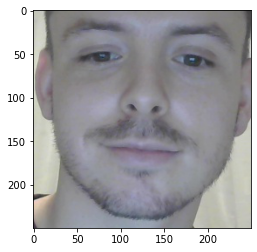

In [109]:
inpt_img = plt.imread(r"C:\Users\alexs\application_data\input_image\input_image.jpg")

plt.imshow(inpt_img)

We note, the verification function within a given threshold has printed a True value, and from confirmation by inspection we can confirm the image is correctly classified.

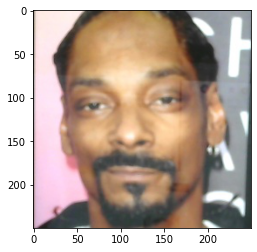

In [111]:
inpt_img2 = plt.imread(r"C:\Users\alexs\application_data\input_image\input_image.jpg")

plt.imshow(inpt_img2)

We note, the verification function within a given threshold has printed a False value, and from confirmation by inspection we can confirm the image is correctly classified.

We then confirm, the model is working as intended to a high degree of accuracy of over 90%. 

In [114]:
# Release 
#camera.release()
#Restart Clause
#cv2.destroyAllWindows()

# Conclusion

To summise the following, we have implementated and instantiated a one-shot convolutional siamese neural network(source: :https://www.cs.cmu.edu/~rsalakhu/papers/oneshot1.pdf) to classify the similarity of two given inputs, to be used in a facial recognition domain. We implemented a regularised cross-entropy objective on the given binary classifier as a loss function with adam optimisation. The results of the network obtained after 50 epochs of training were a loss of 0.0005608657, and a precision and recall performance metric of 0.998. This result is spectacular given at face value, however we remain skeptical due to the nature of the result, more statistical analysis will be required to measure overfitting within the model. However, we pose the accuracy is within the realms of reason, as we have implemented as state-of-the-art convolutional neural network, where the original paper reports statistics of 93.15% post-affine distortions, trained on an exceedingly smaller dataset, under the 20 epoch range. 

Future work includes, strict evaluation of performance results including statistical analysis into the overfitting phenomenom. Moreover, we wish to expand on the current research presented, and implement the facial recognition application as hinted to previously under the kivy libraries. 